In this notebook, I will demonstrate how to visualize static and animated images of structures without having to use any outside program. This can be done from any notebook.

In [36]:
import sys
sys.path.append('../code')
from Visualize_Structures import Structure3DPlot, Structure3DAnimation
from ase.io import read
import numpy as np
import matplotlib.pyplot as plt

### Static Plot

First I will import the propanol structures used as an example by the librascal code. I will use these through most of this tutorial

In [37]:
distorted_propanols = read("../data/distorted_propanol.extxyz.gz", ":100")
one_distorted_propanol = distorted_propanols[0]

You can quickly plot the structure with default visual parameters by using Structure3DPlot(Your_ASE_Atoms_Object).Plot()

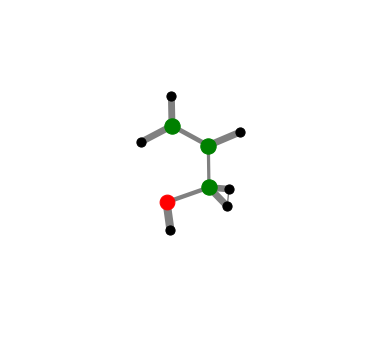

In [38]:
Structure3DPlot(one_distorted_propanol).Plot();

The default parameters are defined in the following function:

In [39]:
plot_object = Structure3DPlot(one_distorted_propanol)
plot_object.SetVisualParameters??

Signature: plot_object.SetVisualParameters(**kwargs)
Docstring: <no docstring>
Source:   
    def SetVisualParameters(self, **kwargs):
        # bl is short for bond length
        # bw is short for bond width
        
        self.title = kwargs.get("title", "")        
        
        self.figsize = kwargs.get('figsize', (6.5, 6))
        self.elevation = kwargs.get('elevation', 70)
        self.azimuth = kwargs.get('azimuth', 0)
        self.sidelength = kwargs.get('sidelength', 6)
        self.no_grid = kwargs.get('no_grid', True)
        self.no_axis = kwargs.get('no_axis', True)
        
        self.element_colors = kwargs.get('element_colors', {"C":"g", "O":"r", "H":"k", "N":"b"})
        self.element_sizes = kwargs.get('element_sizes', {"C":0.77, "O":0.74, "H":0.46, "N":0.74})
        
        self.atom_size_scale_factor = kwargs.get('atom_size_scale_factor', 120/self.sidelength)
        
        self.bond_color = kwargs.get('bond_color', "gray")
        
        self.variabl

To modify any of these parameters:
1. Create the Structure3DPlot object  
2. Call the SetVisualParameters method, passing your desired parameter as a kwarg  
3. Call the Plot method  

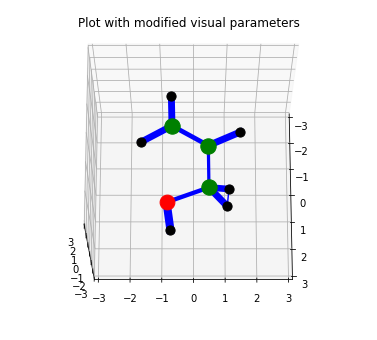

In [40]:
plot_object = Structure3DPlot(one_distorted_propanol)
plot_object.SetVisualParameters(bond_color="blue", no_axis=False, no_grid=False, title="Plot with modified visual parameters")
plot_object.Plot();

"Bonds" are simply drawn for every pair of atoms within some max_bl distance.  In the future I might want to offer the option of eliminating bonds between certain element pairs such as H-H.    
By default, bond width varies with bond length. You can change this by setting variable_bw = False.  

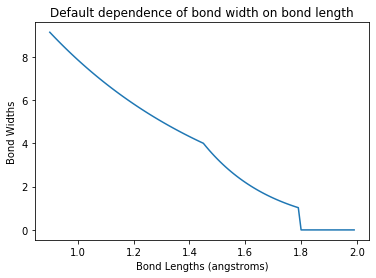

In [41]:
bond_lengths = np.arange(.9,2.0,.01)
bond_widths = []
plot_object = Structure3DPlot(one_distorted_propanol)
for bl in bond_lengths:
    bond_widths.append(plot_object.BondWidth(bl))
plt.plot(bond_lengths, bond_widths)
plt.xlabel("Bond Lengths (angstroms)")
plt.ylabel("Bond Widths")
plt.title("Default dependence of bond width on bond length");

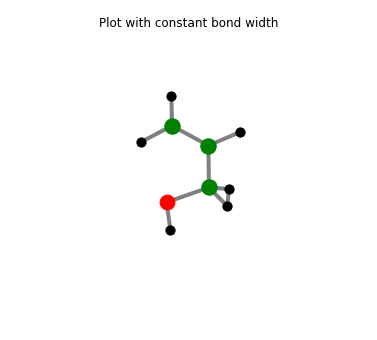

In [42]:
plot_object = Structure3DPlot(one_distorted_propanol)
plot_object.SetVisualParameters(variable_bw=False, title="Plot with constant bond width")
plot_object.Plot();

### Animated Plot

You can quickly animate the structures with default visual parameters by using Structure3DAnimation(Your_ASE_Atoms_Object_list).Plot()

In [43]:
Structure3DAnimation(distorted_propanols).Plot()

Generating animation frame 0 (0% complete)
Generating animation frame 10 (10% complete)
Generating animation frame 20 (20% complete)
Generating animation frame 30 (30% complete)
Generating animation frame 40 (40% complete)
Generating animation frame 50 (50% complete)
Generating animation frame 60 (60% complete)
Generating animation frame 70 (70% complete)
Generating animation frame 80 (80% complete)
Generating animation frame 90 (90% complete)
Generating animation frame 100 (100% complete)


The default visual parameters can be found and modified in the same way as they were for the static plot class

In [44]:
animation_object = Structure3DAnimation(distorted_propanols)
animation_object.SetVisualParameters??

Signature: animation_object.SetVisualParameters(**kwargs)
Docstring: <no docstring>
Source:   
    def SetVisualParameters(self, **kwargs):
        # bl is short for bond length
        # bw is short for bond width
        
        self.verbose = kwargs.get('verbose', True)
        self.print_interval = kwargs.get("print_interval", 10)
        self.title = kwargs.get("title", "")
        
        self.frames = kwargs.get('frames', 100)
        self.frame_rate = kwargs.get('frame_rate', 10)
        
        self.rotate = kwargs.get('rotate', False)
        self.rotation_rates = kwargs.get('rotation_rates', {'elev':.1, 'azim':.05})
        
        self.figsize = kwargs.get('figsize', (6.5, 6))
        self.elevation = kwargs.get('elevation', 70)
        self.azimuth = kwargs.get('azimuth', 0)
        self.sidelength = kwargs.get('sidelength', 6)
        self.no_grid = kwargs.get('no_grid', True)
        self.no_axis = kwargs.get('no_axis', True)
        
        self.element_colors = kw

In [45]:
animation_object = Structure3DAnimation(distorted_propanols)
animation_object.SetVisualParameters(sidelength=20, title="Animation with modified visual parameters")
animation_object.Plot()

Generating animation frame 0 (0% complete)
Generating animation frame 10 (10% complete)
Generating animation frame 20 (20% complete)
Generating animation frame 30 (30% complete)
Generating animation frame 40 (40% complete)
Generating animation frame 50 (50% complete)
Generating animation frame 60 (60% complete)
Generating animation frame 70 (70% complete)
Generating animation frame 80 (80% complete)
Generating animation frame 90 (90% complete)
Generating animation frame 100 (100% complete)


In addition to the mutable parameters from the static plot class, there are some new animation specific options.  
* You can rotate the structure
* You can force the center of geometry to stay constant or allow it to drift
* You can list which structures from the trajectory/structure list appear in the animation
* You can change the frame rate

In [50]:
animation_object = Structure3DAnimation(distorted_propanols)
animation_object.SetVisualParameters(rotate=True, rotation_rates = {"elev":0, "azim":2 }, frame_rate=20,  title="Rotating animation")
animation_object.Plot()

Generating animation frame 0 (0% complete)
Generating animation frame 10 (10% complete)
Generating animation frame 20 (20% complete)
Generating animation frame 30 (30% complete)
Generating animation frame 40 (40% complete)
Generating animation frame 50 (50% complete)
Generating animation frame 60 (60% complete)
Generating animation frame 70 (70% complete)
Generating animation frame 80 (80% complete)
Generating animation frame 90 (90% complete)
Generating animation frame 100 (100% complete)


In [47]:
N2_md = read("../data/sample_O2_trajectory.traj", ":")
animation_object = Structure3DAnimation(N2_md)
animation_object.SetVisualParameters( adjust_COM="initial", sidelength=4, frame_rate = 40, title="Animation with drifting center")
animation_object.Plot()

Generating animation frame 0 (0% complete)
Generating animation frame 10 (10% complete)
Generating animation frame 20 (20% complete)
Generating animation frame 30 (30% complete)
Generating animation frame 40 (40% complete)
Generating animation frame 50 (50% complete)
Generating animation frame 60 (60% complete)
Generating animation frame 70 (70% complete)
Generating animation frame 80 (80% complete)
Generating animation frame 90 (90% complete)
Generating animation frame 100 (100% complete)


In [48]:
C7O2H10s = read("../data/C7O2H10.extxyz.gz", ":6")
animation_object = Structure3DAnimation(C7O2H10s)
animation_object.SetVisualParameters( frames = [0,1,2,1,3,1,4,1,5,1], frame_rate = 3, title="Animation with modified structure order")
animation_object.Plot()

Generating animation frame 0 (0% complete)
Generating animation frame 10 (100% complete)
